**과제**

데이터셋에 요일, 시간 컬럼 추가하여 DT를 학습시키고 평가하시오.

- 요일, 시간 자유롭게 -> 성능이 높아지는 방향으로 고민, 그 내용을 소스코드에 코멘트
- 요일 형식
  - Sun, Mon, Tue, Wed, Thu, Fri, Sat
- 시간 형식
  - HH-MM-SS

In [80]:
from google.colab import drive
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [81]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz

file_path = "/gdrive/MyDrive/ml_colab/week3/PlayTennis_new.csv"
datas = pd.read_csv(file_path)

print(datas)

     outlook  temp humidity  windy play  day      time
0      sunny   hot     high  False   no  Mon  04-53-24
1      sunny   hot     high   True   no  Wed  14-23-36
2   overcast   hot     high  False  yes  Fri  11-51-23
3      rainy  mild     high  False  yes  Wed  12-00-14
4      rainy  cool   normal  False  yes  Fri  08-23-15
5      rainy  cool   normal   True   no  Tue  09-27-35
6   overcast  cool   normal   True  yes  Sat  10-24-36
7      sunny  mild     high  False   no  Sat  21-12-45
8      sunny  cool   normal  False  yes  Sat  13-25-37
9      rainy  mild   normal  False  yes  Sun  17-23-24
10     sunny  mild   normal   True  yes  Wed  15-24-25
11  overcast  mild     high   True  yes  Fri  13-24-56
12  overcast   hot   normal  False  yes  Sat  05-24-51
13     rainy  mild     high   True   no  Fri  20-25-31


In [82]:
''' 시간 데이터 전처리 '''
'''
  - 자질 구성 시 고려사항 -> 복잡한 자질
    => 시간-분-초가 하나의 데이터로 처리되는 경우, 초 하나만 바뀌어도 완전히 다른 데이터가 되기 때문에 빈도가 낮아 엔트로피가 높게 측정되므로 변환이 필요하다고 판단하였습니다.
  - 따라서, 데이터를 분할하여 독립적으로 사용하고자 합니다.
  - 요일과 시간 데이터에 대한 분할 방식은 각 부분에서 서술하겠습니다.'''

# 요일
'''
    평일: 월, 화, 수, 목
    주말: 금, 토, 일
    
    제 아버지의 경우, 금요일에 골프를 치러 가시거나 주말에 치셨습니다. 또한, 사람들은 금요일에 휴가를 내고 금~일(3일) 동안 휴가를 떠나곤 합니다.
    숙소를 예약하거나 항공사에서 비행기를 예약할 때도 금, 토, 일을 주말로 따집니다.
    이러한 경험에 따라, 금요일을 주말에 포함하였습니다.
'''
weekday = ['Mon', 'Tue', 'Wed', 'Thu']
weekend = ['Fri', 'Sat', 'Sun']

for i in range(len(datas)):
  if datas['day'][i] in weekday:
    datas['day'][i] = 'weekday'
  elif datas['day'][i] in weekend:
    datas['day'][i] = 'weekend'


# 시간
''' 
    새벽: 00-00-00 ~ 06-00-00
    오전: 06-00-00 ~ 12-00-00
    낮: 12-00-00 ~ 18-00-00
    저녁: 18-00-00 ~ 24-00-00

    처음에는 1초라도 바뀌면 서로 다른 데이터가 되기 때문에, 각 정보에 대한 빈도가 매우 낮으니 데이터를 나눠야겠다!라는 생각 하나로,
    단순하게 강의 자료의 예제(Date to Year, Month, Day)에서와 같이 HH-MM-SS의 데이터를 시간, 분, 초로, 총 3개의 데이터로 나누어 사용하려고 하였습니다.
    
    하지만, 이는 의미가 없다고 판단하였습니다.
    시간, 분, 초가 연관있는 정보인데, 초로만 판단하거나, 분으로만 판단하는 것은 의미가 없다고 생각하였기 때문입니다.

    따라서, 시간대를 나누자는 생각을 하게되었습니다.
    사람들은 주로 새벽에 잠을 자고, 오전과 낮, 저녁에 활동을 합니다.
    이와 같이, 크게 4개의 시간대로 나눌 수 있다고 생각하였고, 정오부터 6시간씩 기준을 두고, 새벽, 오전, 낮, 밤으로 나누었습니다.

    
'''
dawn = '00-00-00'
morning = '06-00-00'
daytime = '12-00-00'
night = '18-00-00'
noon = '24-00-00'


for i in range(len(datas)):
  if datas['time'][i] >= dawn and datas['time'][i] < morning:
    datas['time'][i] = 'dawn'
  elif datas['time'][i] >= morning and datas['time'][i] < daytime:
    datas['time'][i] = 'morning'
  elif datas['time'][i] >= daytime and datas['time'][i] < night:
    datas['time'][i] = 'daytime'
  elif datas['time'][i] >= night and datas['time'][i] < noon:
    datas['time'][i] = 'night'


print(datas)

     outlook  temp humidity  windy play      day     time
0      sunny   hot     high  False   no  weekday     dawn
1      sunny   hot     high   True   no  weekday  daytime
2   overcast   hot     high  False  yes  weekend  morning
3      rainy  mild     high  False  yes  weekday  daytime
4      rainy  cool   normal  False  yes  weekend  morning
5      rainy  cool   normal   True   no  weekday  morning
6   overcast  cool   normal   True  yes  weekend  morning
7      sunny  mild     high  False   no  weekend    night
8      sunny  cool   normal  False  yes  weekend  daytime
9      rainy  mild   normal  False  yes  weekend  daytime
10     sunny  mild   normal   True  yes  weekday  daytime
11  overcast  mild     high   True  yes  weekend  daytime
12  overcast   hot   normal  False  yes  weekend     dawn
13     rainy  mild     high   True   no  weekend    night


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to b

In [83]:
# 데이터 변환 (문자열 -> 숫자)
label_encoder = LabelEncoder()

target_names = label_encoder.fit(datas['play']).classes_
print("target_names : {}".format(target_names))

datas['outlook'] = label_encoder.fit_transform(datas['outlook'])
datas['temp'] = label_encoder.fit_transform(datas['temp'])
datas['humidity'] = label_encoder.fit_transform(datas['humidity'])
datas['windy'] = label_encoder.fit_transform(datas['windy'])
datas['play'] = label_encoder.fit_transform(datas['play'])
datas['day'] = label_encoder.fit_transform(datas['day'])
datas['time'] = label_encoder.fit_transform(datas['time'])


print(datas)

target_names : ['no' 'yes']
    outlook  temp  humidity  windy  play  day  time
0         2     1         0      0     0    0     0
1         2     1         0      1     0    0     1
2         0     1         0      0     1    1     2
3         1     2         0      0     1    0     1
4         1     0         1      0     1    1     2
5         1     0         1      1     0    0     2
6         0     0         1      1     1    1     2
7         2     2         0      0     0    1     3
8         2     0         1      0     1    1     1
9         1     2         1      0     1    1     1
10        2     2         1      1     1    0     1
11        0     2         0      1     1    1     1
12        0     1         1      0     1    1     0
13        1     2         0      1     0    1     3


In [75]:
# 입력 데이터와 정답 데이터로 분리
x_data, y_data = datas.drop(['play'], axis=1), datas['play']

# 분리 결과 확인
print(x_data)
print()
print(y_data)

    outlook  temp  humidity  windy  day  time
0         2     1         0      0    0     0
1         2     1         0      1    0     1
2         0     1         0      0    1     2
3         1     2         0      0    0     1
4         1     0         1      0    1     2
5         1     0         1      1    0     2
6         0     0         1      1    1     2
7         2     2         0      0    1     3
8         2     0         1      0    1     1
9         1     2         1      0    1     1
10        2     2         1      1    0     1
11        0     2         0      1    1     1
12        0     1         1      0    1     0
13        1     2         0      1    1     3

0     0
1     0
2     1
3     1
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    0
Name: play, dtype: int64


In [84]:
# Decision tree 모델 학습 ()

# 우리가 criterion = 'entropy' 를 기준으로 하기 때문
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy')
train_result = decision_tree.fit(x_data, y_data)

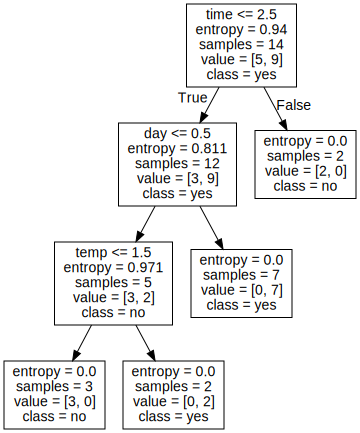

In [85]:
''' 학습 결과 확인 '''


graph = graphviz.Source(tree.export_graphviz(train_result, out_file=None,
                                             feature_names=x_data.columns,
                                             class_names=target_names)) 
graph

In [86]:
# 학습한 모델을 사용하여 예측
predict_result = decision_tree.predict(x_data)

# 예측 결과 출력 (실제 정답을 맞춘 경우 True로 표시됨)
print(predict_result == y_data)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: play, dtype: bool
